In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Bringing in the Data and Observing it

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_excel('/content/drive/My Drive/PROJECTS/Amazon_2_Raw.xlsx')
data.head()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


##Data Information

Change the dtypes here for ease of use for the rest of the project

Some immediate insights are:
* We have 10 columns and 3,303 rows
* No null values in any columns
* No missing data in any of the columns
* Column names are clear on what they represent
* General Summary Statistics that we will dive into further

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   Sales         3203 non-null   float64       
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 250.4+ KB


In [95]:
data.isnull().sum()

Order ID        0
Order Date      0
Ship Date       0
EmailID         0
Geography       0
Category        0
Product Name    0
Sales           0
Quantity        0
Profit          0
dtype: int64

In [96]:
data.describe()

,Order Date,Ship Date,Sales,Quantity,Profit
count,3203,3203,3203.000000,3203.000000,3203.000000
mean,2013-05-10 03:06:07.530440192,2013-05-14 01:25:25.195129600,226.493233,3.828910,33.849032
min,2011-01-07 00:00:00,2011-01-09 00:00:00,0.990000,1.000000,-3399.980000
25%,2012-05-22 00:00:00,2012-05-26 00:00:00,19.440000,2.000000,3.852000
50%,2013-07-22 00:00:00,2013-07-25 00:00:00,60.840000,3.000000,11.166400
75%,2014-05-23 00:00:00,2014-05-27 00:00:00,215.809000,5.000000,33.000400
max,2014-12-31 00:00:00,2015-01-06 00:00:00,13999.960000,14.000000,6719.980800
std,NaN,NaN,524.876877,2.260947,174.109081


In [97]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'EmailID', 'Geography',
       'Category', 'Product Name', 'Sales', 'Quantity', 'Profit'],
      dtype='object')

#Question 1
- How much are our top-ordered customers bringing in as profit?
- How does this profit compare to other customers?

In [57]:
#Find out who our top-ordered customers are (top 10)
data["EmailID"].astype(str)
top_10 = data["EmailID"].value_counts()[:10].reset_index()
top_10.columns = ['EmailID', 'Number of Purchases']
top_10

,EmailID,Number of Purchases
0,WilliamBrown@gmail.com,24
1,ArthurPrichep@gmail.com,23
2,RickWilson@gmail.com,19
3,GregGuthrie@gmail.com,17
4,ZuschussCarroll@gmail.com,16
5,DarrinSayre@gmail.com,16
6,SallyHughsby@gmail.com,15
7,LenaCreighton@gmail.com,15
8,ArianneIrving@gmail.com,15
9,LenaCacioppo@gmail.com,15


In [58]:
#make customer list for our graph later
top_10['EmailID'] = top_10['EmailID'].astype("string")
email_list = top_10['EmailID'].tolist()

customer_list = []
for name in email_list:
  customer_list.append(name.split('@')[0])

customer_list

['WilliamBrown',
 'ArthurPrichep',
 'RickWilson',
 'GregGuthrie',
 'ZuschussCarroll',
 'DarrinSayre',
 'SallyHughsby',
 'LenaCreighton',
 'ArianneIrving',
 'LenaCacioppo']

In [59]:
#Lets add the cumulative profits for each top-ordered customer

profit_list = []
for email_id in email_list:
    profit_list.append(data.Profit[data.EmailID == email_id].sum())

top_10['Profit'] = profit_list
top_10

,EmailID,Number of Purchases,Profit
0,WilliamBrown@gmail.com,24,825.2906
1,ArthurPrichep@gmail.com,23,379.3169
2,RickWilson@gmail.com,19,1018.4992
3,GregGuthrie@gmail.com,17,122.3490
4,ZuschussCarroll@gmail.com,16,346.0942
5,DarrinSayre@gmail.com,16,141.6658
6,SallyHughsby@gmail.com,15,269.3670
7,LenaCreighton@gmail.com,15,350.5691
8,ArianneIrving@gmail.com,15,792.8347
9,LenaCacioppo@gmail.com,15,157.9275


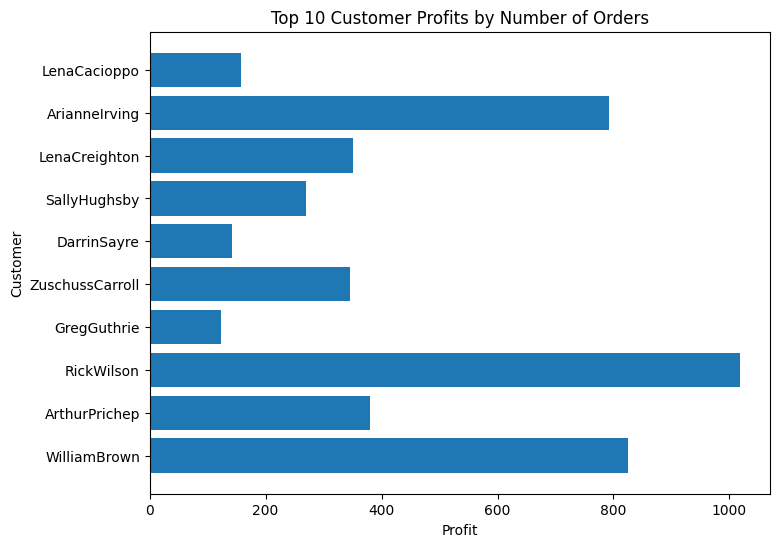

In [60]:
#make a horizontal bar plot for a visual representation of our top-ordered customers

email_ids = customer_list
profits = top_10['Profit']

# Create the hoizontal bar plot
fig, ax = plt.subplots(figsize = (8,6))
ax.barh(email_ids, profits)

# Set the labels and title
ax.set_xlabel('Profit')
ax.set_ylabel('Customer')
ax.set_title('Top 10 Customer Profits by Number of Orders')

# Display the plot
plt.show()

In [61]:
#How do they compare to other customers? Are our top 10 ordered customers our most profitable?

#Finding top 10 earners
all_emails = data.EmailID.unique()

top_earners = []
for email_id in all_emails:
    top_earners.append(data.Profit[data.EmailID == email_id].sum())

top_df = pd.DataFrame(all_emails, top_earners).reset_index()
top_df.columns = (['Total_profit', 'EmailID'])
top10_earners = top_df.sort_values('Total_profit', ascending = False)[:10]
top10_earners

,Total_profit,EmailID
609,6807.0879,RaymondBuch@gmail.com
196,2073.2828,JaneWaco@gmail.com
218,1991.9043,FredHopkins@gmail.com
397,1789.6906,DennisPardue@gmail.com
465,1598.5092,RobertMarley@gmail.com
214,1551.5945,YanaSorensen@gmail.com
70,1535.8919,AlanDominguez@gmail.com
203,1185.3977,GaryHwang@gmail.com
62,1148.7333,JosephHolt@gmail.com
384,1056.3060,PenelopeSewall@gmail.com


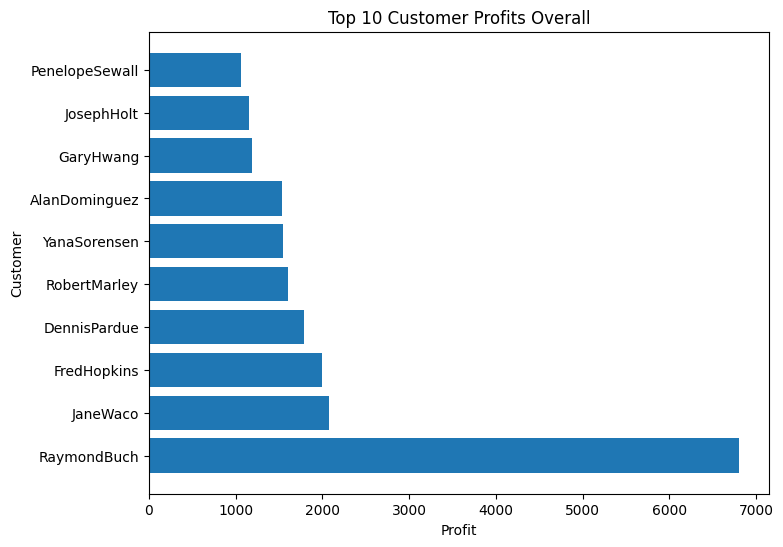

In [62]:
#lets graph the result
#make customer list for our graph
top10_earners['EmailID'] = top10_earners['EmailID'].astype("string")
top_email_list = top10_earners['EmailID'].tolist()

top_customer_list = []
for name in top_email_list:
  top_customer_list.append(name.split('@')[0])

#make a horizontal bar plot for a visual representation of our top-earning customers

top_email_ids = top_customer_list
top_profits = top10_earners['Total_profit']

# Create the hoizontal bar plot
fig, ax = plt.subplots(figsize = (8,6))
ax.barh(top_email_ids, top_profits)

# Set the labels and title
ax.set_xlabel('Profit')
ax.set_ylabel('Customer')
ax.set_title('Top 10 Customer Profits Overall')

# Display the plot
plt.show()

We can observe from this data that the number of orders does not relate to total profits within this dataset. None of our top-ordered customers were featured in the top 10 overall earners.

We should also think about sending Mr. Raymond Buch a thank you card from the company for being a well-valued customer.

#Question 2
- What kinds of products are bringing in the most profit?

In [63]:
#Lets see what types of products our top 10 earners were purchasing
filtered_data = data[data['EmailID'].isin(top_email_list)]

email_category_lists = {}

for index, row in filtered_data.iterrows():
  email_id = row['EmailID']
  category = row['Category']

  if email_id not in email_category_lists:
    email_category_lists[email_id] = []

  email_category_lists[email_id].append(category)

email_category_profit = {}

for index, row in filtered_data.iterrows():
  email_id = row['EmailID']
  category = row['Category']
  profit = row['Profit']

  if email_id not in email_category_profit:
    email_category_profit[email_id] = {}

  email_category_profit[email_id][category] = profit

email_category_profit

{'JosephHolt@gmail.com': {'Appliances': 36.372,
  'Accessories': 377.9622,
  'Binders': 19.968,
  'Paper': 46.1184,
  'Fasteners': 1.7876},
 'AlanDominguez@gmail.com': {'Copiers': 1379.977,
  'Storage': 56.301,
  'Paper': 80.3404},
 'JaneWaco@gmail.com': {'Furnishings': 3.6632,
  'Chairs': -99.6219,
  'Paper': 180.7659,
  'Accessories': 39.8886,
  'Phones': -7.996,
  'Binders': 1906.485},
 'GaryHwang@gmail.com': {'Furnishings': 2.6208,
  'Paper': 61.96,
  'Storage': -58.6872,
  'Art': 9.7092,
  'Fasteners': 8.95,
  'Binders': 1061.5722,
  'Accessories': 43.5981},
 'YanaSorensen@gmail.com': {'Storage': 4.4392,
  'Binders': 942.8157,
  'Furnishings': 22.4196,
  'Accessories': 40.12,
  'Chairs': -38.2116},
 'FredHopkins@gmail.com': {'Storage': 2.7062,
  'Copiers': 1480.4671,
  'Paper': 100.656,
  'Binders': 51.8238,
  'Art': 6.912},
 'PenelopeSewall@gmail.com': {'Copiers': 1049.985, 'Paper': 6.321},
 'DennisPardue@gmail.com': {'Appliances': 24.3595,
  'Storage': 4.1916,
  'Fasteners': 1.9

In [64]:
#Lets pop Raymond's copiers profit to increase visibilbity on our graph
#We will take into account that this value is the highest profit amongst all top earners by far
email_category_profit['RaymondBuch@gmail.com'].pop('Copiers')

6719.9808

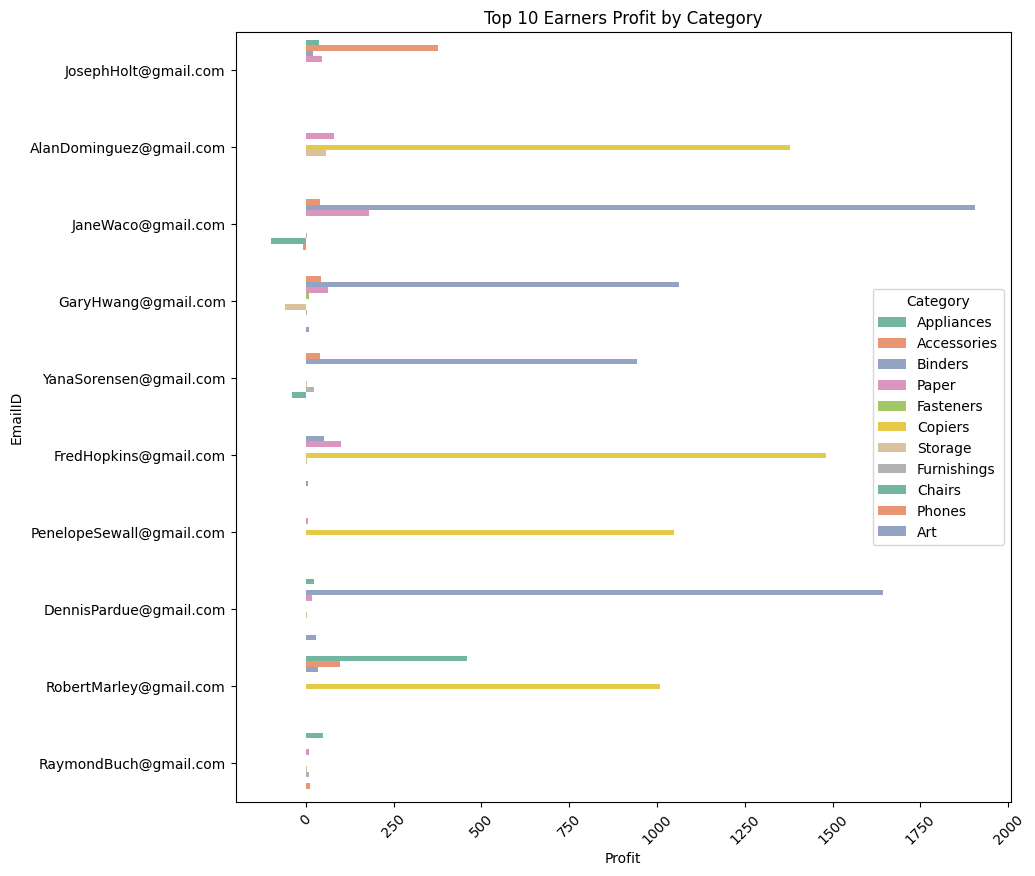

In [65]:
#Lets graph the results using a horizontal bar graph in seaborn

# Flatten the nested dictionary
ecp_flattened_data = [(email, category, profit)
                  for email, categories in email_category_profit.items()
                  for category, profit in categories.items()]

# Create a DataFrame from the flattened data
df = pd.DataFrame(ecp_flattened_data, columns=['EmailID', 'Category', 'Profit'])

# Create a horizontal bar plot
plt.figure(figsize=(10, 10))
bar_plot = sns.barplot(x='Profit', y= 'EmailID', hue='Category', data=df, orient='h', linewidth = 10, palette = 'Set2')

# Set plot title
plt.title('Top 10 Earners Profit by Category')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

We can deduce from this graph that the Categories "Copiers" and "Binders" dominate the top profit spots for these top earners. Also remember that Mr. Raymond Buch had a profit of $6719 from copiers that would have extended well beyond this graph.

Depending on profit margins for the other categories, we can choose to advertise for products not yet appearing in our top results or hit harder on the categories that are bringing in these massive profits.



Does this hold true for the total amount of profit per category?

In [66]:
#Finding the total profit for each category
df_cat_profit = data.groupby(['Category']).Profit.sum().reset_index()
df_sorted = df_cat_profit.sort_values(by = 'Profit', ascending = False)
df_sorted

,Category,Profit
6,Copiers,19327.2351
0,Accessories,16484.5983
3,Binders,16096.8016
12,Paper,12119.2364
13,Phones,9110.7426
14,Storage,8645.3222
1,Appliances,8261.2699
9,Furnishings,7641.2704
5,Chairs,4027.5843
2,Art,2374.0970


In [67]:
#Finding the Profit Margin for each Category
#Bearing in mind that our data does not show the cost/expenses to make each item
#Our Profit Margin in this case is defined by "Profit / Sales"

df_small = data.groupby('Category')[['Sales', 'Quantity', 'Profit']].sum()
df_small['Profit_Margin'] = (df_small['Profit'] / df_small['Sales']).round(2)
df_small.sort_values(by = "Profit_Margin", ascending = False)

,Sales,Quantity,Profit,Profit_Margin
Category,,,,
Envelopes,4118.1000,227,1908.7624,0.46
Paper,26663.7180,1702,12119.2364,0.45
Labels,5078.7260,480,2303.1223,0.45
Copiers,49749.2420,88,19327.2351,0.39
Fasteners,923.2160,263,275.1907,0.30
Binders,55961.1130,1868,16096.8016,0.29
Appliances,30236.3360,492,8261.2699,0.27
Accessories,61114.1160,1032,16484.5983,0.27
Art,9212.0660,926,2374.0970,0.26


We can see that the theme of Copiers and Binders being our most profitable throughout holds true for our top earners as well.

We can also visualize a slight correlation between categories that bring in the most profit and their respective profit margin which would make sense. The higher the profit margin, the more we should profit from them based on a sizeable amount of orders. Vice-versa for the categories that have a low profit margin.

#Question 3
- Can we deduce what areas are bringing in the most profit? The least?

In [68]:
data.head()

,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


In [69]:
data["Geography"] = data["Geography"].str.split(",").str[-2]
data['Geography']

0       Los Angeles
1       Los Angeles
2       Los Angeles
3       Los Angeles
4       Los Angeles
           ...     
3198    Los Angeles
3199     Costa Mesa
3200     Costa Mesa
3201     Costa Mesa
3202    Westminster
Name: Geography, Length: 3203, dtype: object

In [70]:
#Lets start by segmenting the areas we want to examine
geo_df = pd.DataFrame(data[['Geography', 'Category', 'Profit']])
geo_df

,Geography,Category,Profit
0,Los Angeles,Labels,6.8714
1,Los Angeles,Furnishings,14.1694
2,Los Angeles,Art,1.9656
3,Los Angeles,Phones,90.7152
4,Los Angeles,Binders,5.7825
...,...,...,...
3198,Los Angeles,Accessories,15.2208
3199,Costa Mesa,Furnishings,15.6332
3200,Costa Mesa,Phones,19.3932
3201,Costa Mesa,Paper,13.3200


In [71]:
geo_df = geo_df.groupby('Geography')[['Profit']].sum()
city_profits = geo_df.sort_values(by = "Profit", ascending = False).reset_index()
city_profits

,Geography,Profit
0,Los Angeles,30440.7579
1,Seattle,29156.0967
2,San Francisco,17507.3854
3,San Diego,6377.1960
4,North Las Vegas,2247.6899
...,...,...
164,Springfield,-853.3086
165,Pueblo,-900.9719
166,Colorado Springs,-956.6841
167,Phoenix,-2790.8832


In [72]:
#Lets check to see if the categories have anything to do with the profit for each city
top5_cities = city_profits.head()
top5_cities

,Geography,Profit
0,Los Angeles,30440.7579
1,Seattle,29156.0967
2,San Francisco,17507.3854
3,San Diego,6377.1960
4,North Las Vegas,2247.6899


In [73]:
bottom5_cities = city_profits.tail()
bottom5_cities

,Geography,Profit
164,Springfield,-853.3086
165,Pueblo,-900.9719
166,Colorado Springs,-956.6841
167,Phoenix,-2790.8832
168,Louisville,-3406.2095


In [74]:
#Grabbing the top 5 cities
top5_cities['Geography'].astype(str)
top5_list = top5_cities['Geography'].tolist()
top5_list

['Los Angeles', 'Seattle', 'San Francisco', 'San Diego', 'North Las Vegas']

In [75]:
#Grabbing the bottom 5 cities
bottom5_cities['Geography'].astype(str)
bottom5_list = bottom5_cities['Geography'].tolist()
bottom5_list

['Springfield', 'Pueblo', 'Colorado Springs', 'Phoenix', 'Louisville']

In [76]:
#Lets do some more in depth analysis of why these cities are performing so well/performing so bad
top_cities_df = data[data['Geography'].isin(top5_list)]
top_cities_df = top_cities_df[['Geography', 'Category', 'Profit']]
top_cities_df

prof_cat_top = top_cities_df.groupby(['Geography','Category'])['Profit'].sum().reset_index()
prof_cat_top.columns = ['City', 'Category', 'Profit']
prof_cat_top

,City,Category,Profit
0,Los Angeles,Accessories,5667.2927
1,Los Angeles,Appliances,2593.1313
2,Los Angeles,Art,532.8627
3,Los Angeles,Binders,3411.7499
4,Los Angeles,Bookcases,499.7230
...,...,...,...
73,Seattle,Paper,1445.4253
74,Seattle,Phones,577.9738
75,Seattle,Storage,1659.3006
76,Seattle,Supplies,37.6693


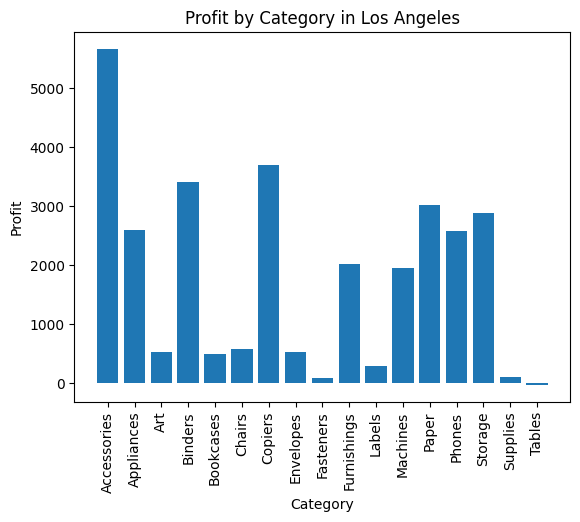

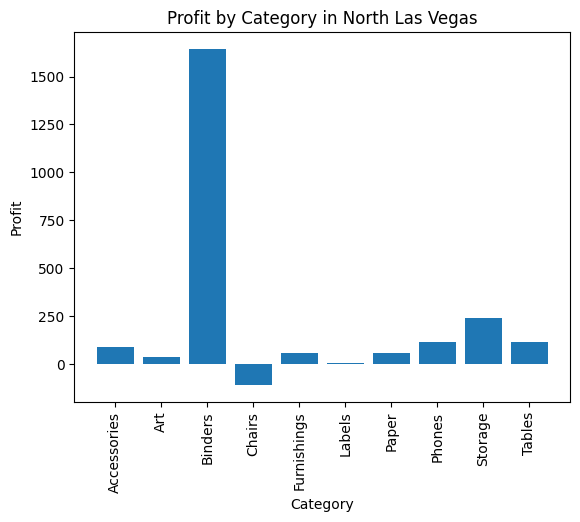

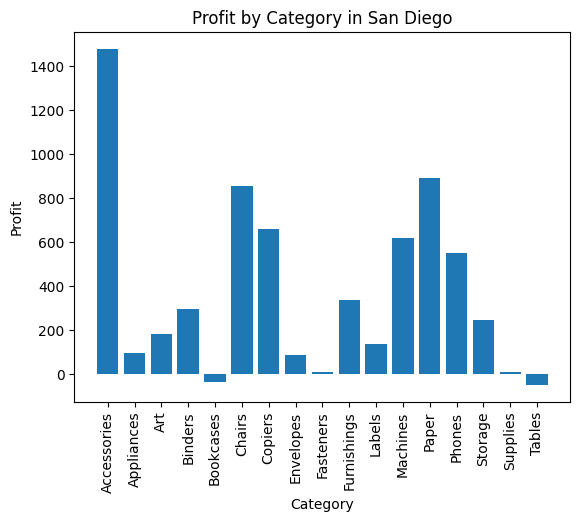

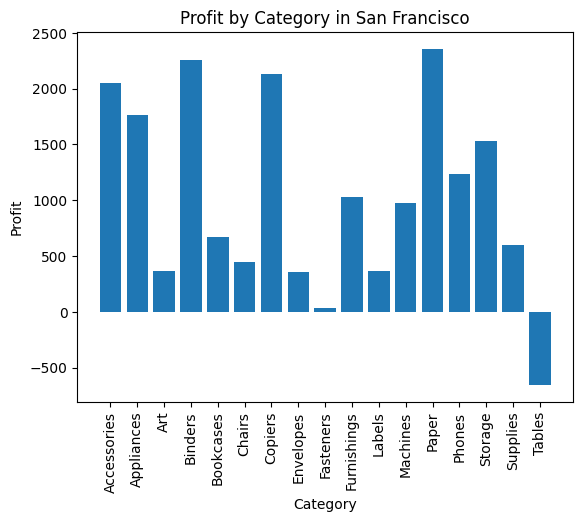

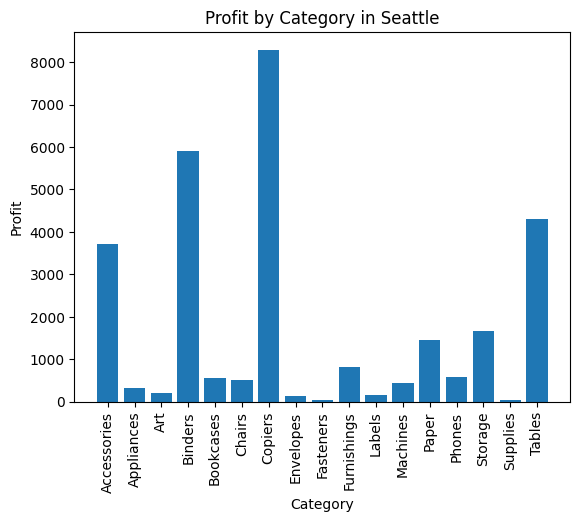

In [77]:
cities = prof_cat_top['City'].unique()

for city in cities:
    city_data = prof_cat_top[prof_cat_top['City'] == city]
    plt.figure()
    plt.bar(city_data['Category'], city_data['Profit'])
    plt.title(f'Profit by Category in {city}')
    plt.xlabel('Category')
    plt.ylabel('Profit')
    plt.xticks(rotation=90)
    plt.show()

In [78]:
#lets trim profit to make it easier to visualize
prof_cat_top = prof_cat_top[prof_cat_top['Profit'] > 1000]
prof_cat_top

,City,Category,Profit
0,Los Angeles,Accessories,5667.2927
1,Los Angeles,Appliances,2593.1313
3,Los Angeles,Binders,3411.7499
6,Los Angeles,Copiers,3704.9333
9,Los Angeles,Furnishings,2027.1744
11,Los Angeles,Machines,1954.1657
12,Los Angeles,Paper,3022.0118
13,Los Angeles,Phones,2582.1462
14,Los Angeles,Storage,2892.6561
19,North Las Vegas,Binders,1644.2913


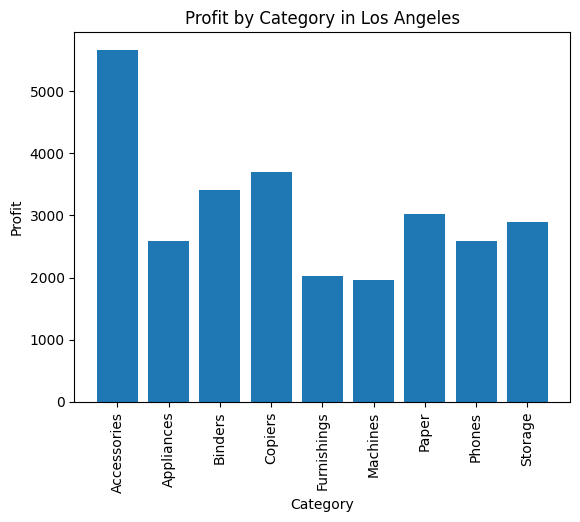

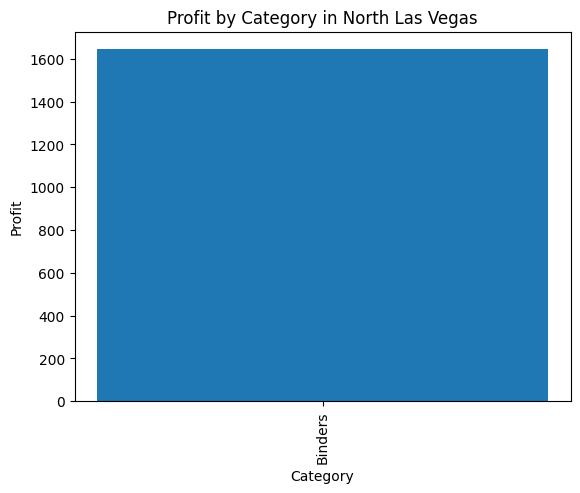

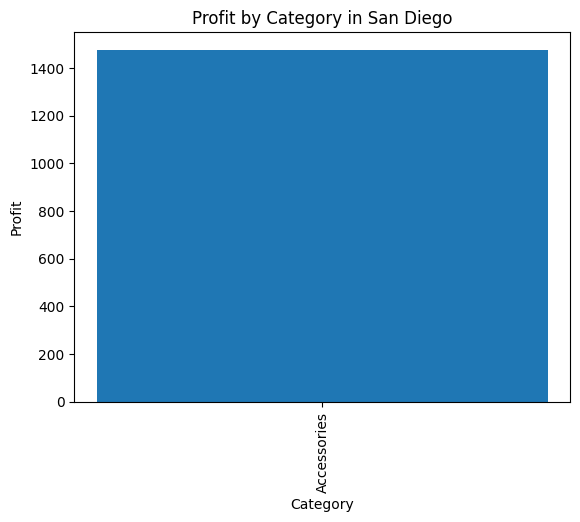

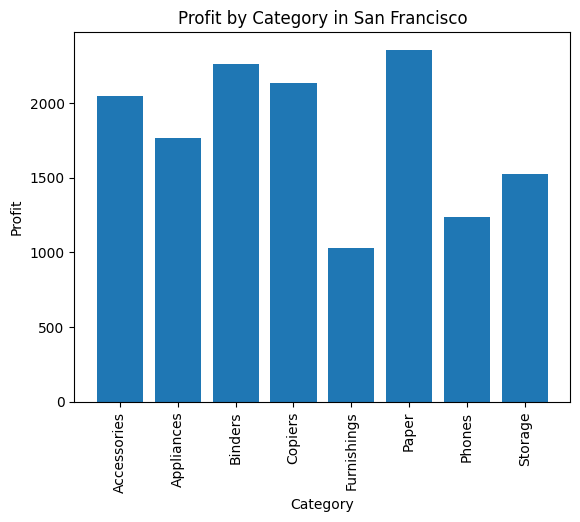

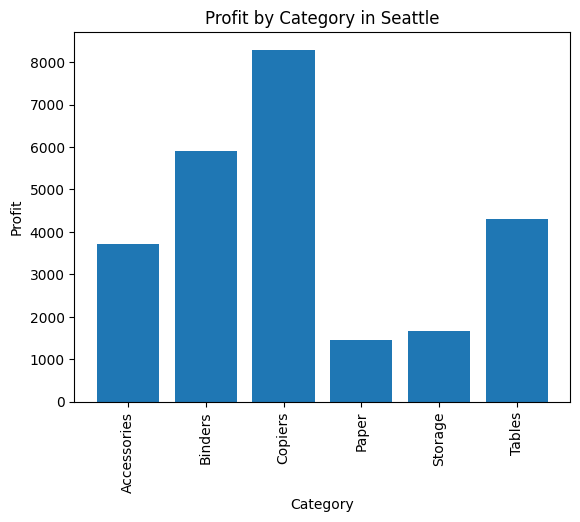

In [79]:
#Lets run the same bar graph loop to zoom in on the cities
for city in cities:
    city_data = prof_cat_top[prof_cat_top['City'] == city]
    plt.figure()
    plt.bar(city_data['Category'], city_data['Profit'])
    plt.title(f'Profit by Category in {city}')
    plt.xlabel('Category')
    plt.ylabel('Profit')
    plt.xticks(rotation=90)
    plt.show()

We can see from the graph our highest earning categories in our highest earning cities. We can use this information to compare to our top performers.

In [80]:
#Now lets check out the bottom cities
bottom_cities_df = data[data['Geography'].isin(bottom5_list)]
bottom_cities_df = bottom_cities_df[['Geography', 'Category', 'Profit']]
bottom_cities_df

prof_cat_bottom = bottom_cities_df.groupby(['Geography','Category'])['Profit'].sum().reset_index()
prof_cat_bottom.columns = ['City', 'Category', 'Profit']
prof_cat_bottom

,City,Category,Profit
0,Colorado Springs,Accessories,-6.5340
1,Colorado Springs,Appliances,4.5738
2,Colorado Springs,Art,5.7515
3,Colorado Springs,Binders,-98.9202
4,Colorado Springs,Bookcases,-930.5344
5,Colorado Springs,Chairs,169.3038
6,Colorado Springs,Fasteners,9.2988
7,Colorado Springs,Furnishings,80.3482
8,Colorado Springs,Paper,58.1944
9,Colorado Springs,Tables,-248.1660


In [81]:
#lets trim profit to make it easier to visualize
prof_cat_bottom = prof_cat_bottom[prof_cat_bottom['Profit'] < -250]
prof_cat_bottom

,City,Category,Profit
4,Colorado Springs,Bookcases,-930.5344
18,Louisville,Machines,-3399.9800
26,Phoenix,Binders,-1287.2978
27,Phoenix,Bookcases,-356.9643
32,Phoenix,Machines,-386.9570
37,Phoenix,Tables,-1491.9276
42,Pueblo,Machines,-938.2800
47,Springfield,Bookcases,-512.9552
58,Springfield,Tables,-664.1691


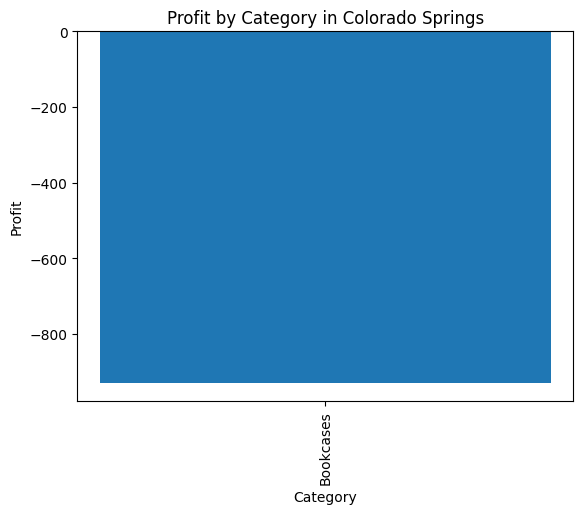

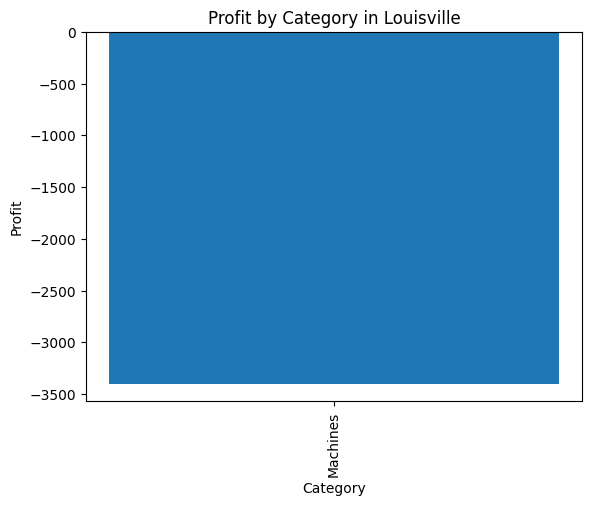

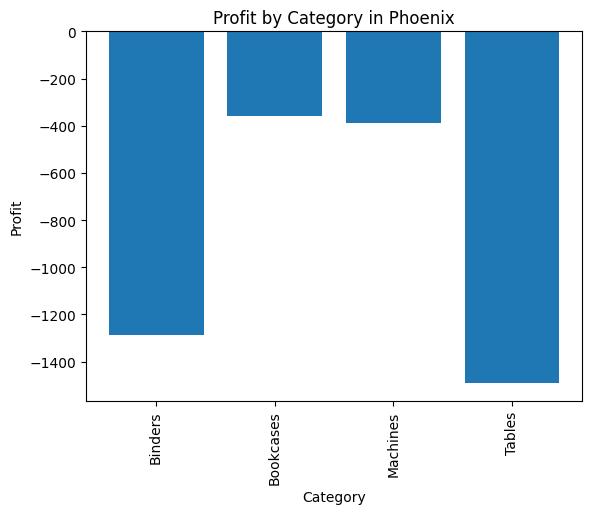

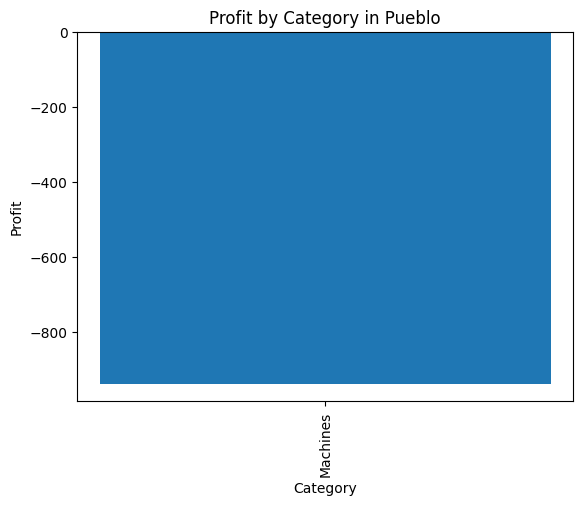

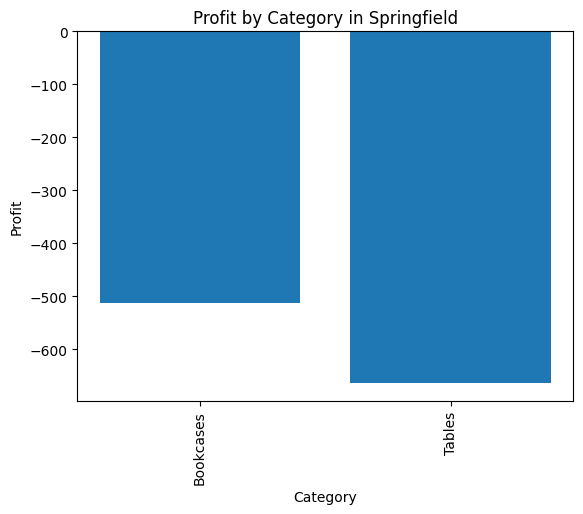

In [82]:
cities = prof_cat_bottom['City'].unique()

for city in cities:
    city_data = prof_cat_bottom[prof_cat_bottom['City'] == city]
    plt.figure()
    plt.bar(city_data['Category'], city_data['Profit'])
    plt.title(f'Profit by Category in {city}')
    plt.xlabel('Category')
    plt.ylabel('Profit')
    plt.xticks(rotation=90)
    plt.show()

Now we can clearly see what our worst performing categories are in our worse performing cities.

#Business Intelligence Information

##Customer Segmentation

In the first 3 questions we segmented our customers in regards to frequency of order and amount of profit brought in.

We can now use Product Recommendations, Efficient Resource Allocation, Targeted Marketing, and other BI initiatives to improve customer retention and increase profits for the business.

##Cohort Analysis

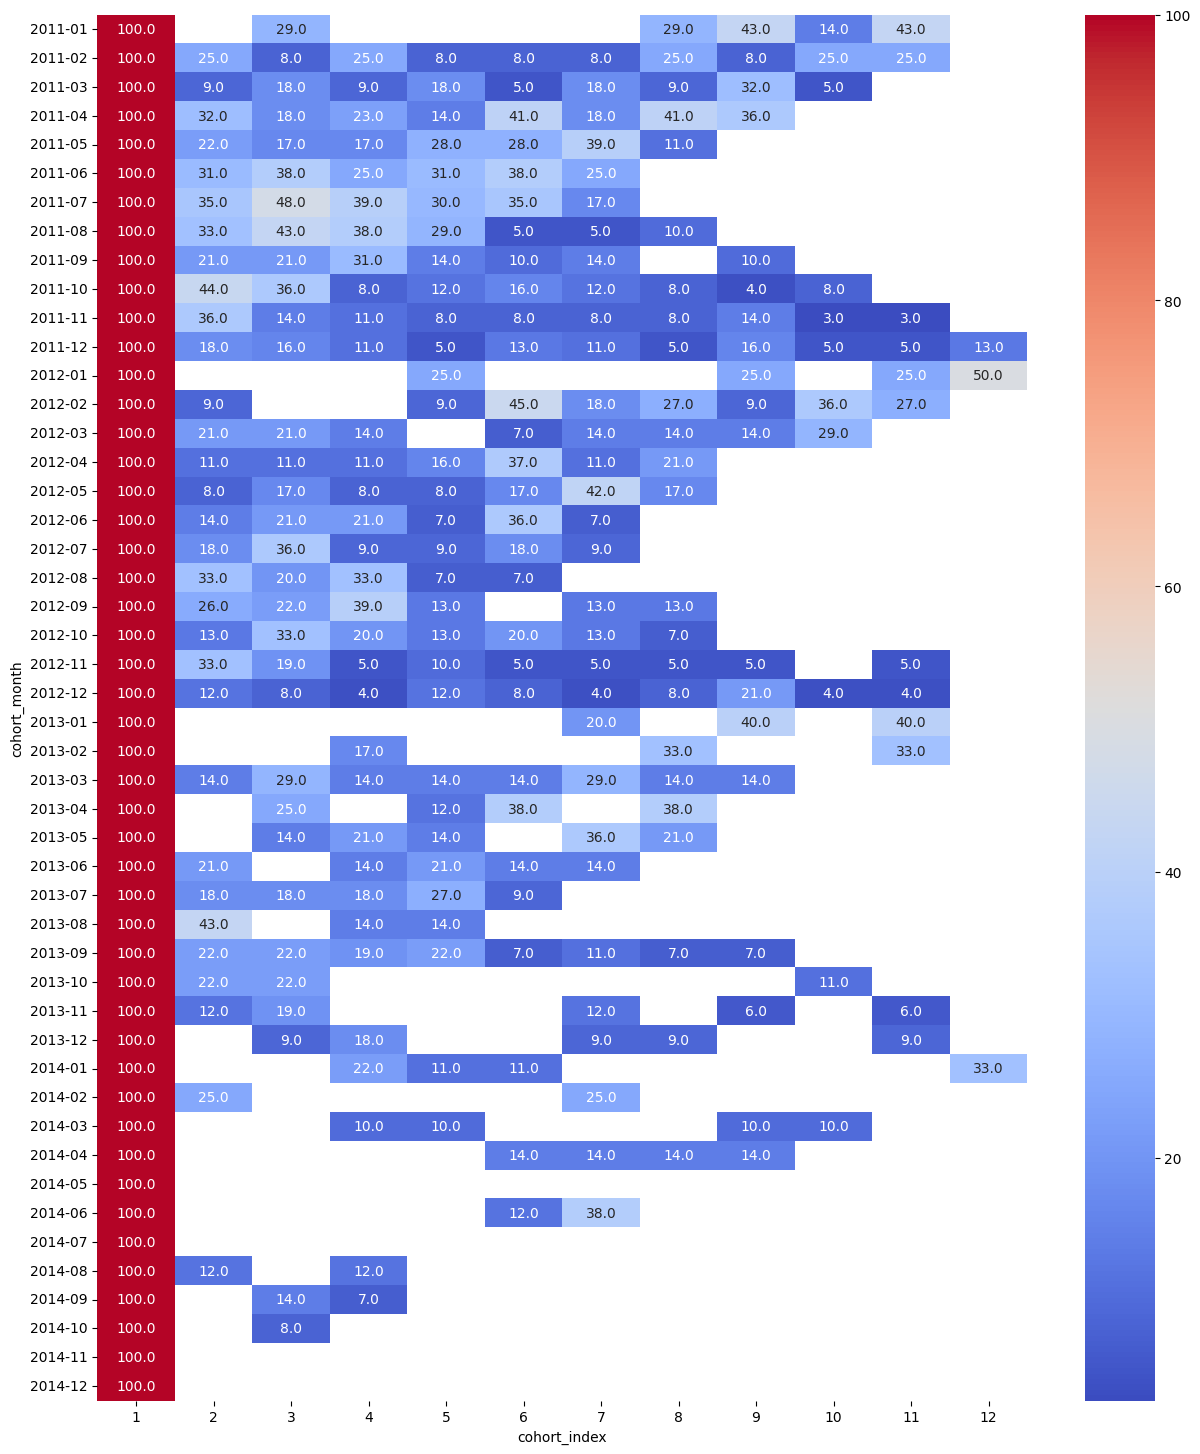

In [86]:
#Lets create a Cohort Index to show the retention rates of our customers over time
cohort_df = data.copy()

cohort_df['order_month'] = cohort_df['Order Date'].dt.to_period('M')
cohort_df['cohort_month'] = cohort_df.groupby('EmailID')['order_month'].transform('min')
cohort_df['cohort_index'] = abs(cohort_df['order_month'].dt.month - cohort_df['cohort_month'].dt.month) + 1

cohort_data = cohort_df.groupby(['cohort_month', 'cohort_index'])['EmailID'].nunique().reset_index()
cohort_df = cohort_data.pivot(index = 'cohort_month',
                              columns = 'cohort_index',
                              values = 'EmailID')
cohort_final = cohort_df.divide(cohort_df.iloc[:,0], axis = 0).round(2) * 100

plt.figure(figsize = (15, 18))
sns.heatmap(cohort_final, annot = True, fmt = '.1f', cmap = 'coolwarm')
plt.show()

This heatmap shows us an overall decline in retention rates over time. We can see this from the general trend of decreasing percentages in the cohort indexes over months.

It will be a focus of this business to target customers early and often to maintain long-term retention and interest from the customers.

We can go deeper with our analysis to do cohort segmentation, cohort size normalization, and correlation as it relates to marketing the products to give more actionable insights into the next step for the business.

##RFM - Segmentation

In [98]:
rfm_df = data.copy()
rfm_df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'EmailID', 'Geography',
       'Category', 'Product Name', 'Sales', 'Quantity', 'Profit'],
      dtype='object')

In [100]:
#Lets calculate some RFM (Recency, Frequency, Monetary Value) values to further segment our customers for analysis

import datetime as dt

rfm_df = data.copy()

#reference date
ref_date = rfm_df['Order Date'].max() + dt.timedelta(days = 1)

#Calculating our RFM metrics
rfm = rfm_df.groupby(['EmailID']).agg({'Order Date': lambda x: (ref_date - x.max()).days,
                                          'Order ID': 'count',
                                          'Sales': 'sum' })
rfm = rfm.rename(columns = {'Order Date': 'Recency',
                            'Order ID': 'Frequency',
                            'Sales': 'Monetary Value'})
rfm.head()

,Recency,Frequency,Monetary Value
EmailID,,,
AaronBergman@gmail.com,1396,3,309.592
AaronHawkins@gmail.com,735,5,1328.124
AaronSmayling@gmail.com,89,3,737.028
AdamBellavance@gmail.com,55,5,2693.918
AdamHart@gmail.com,260,5,463.770


In [101]:
#Lets now set the boundaries of our RFM metrics
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_quartiles = pd.qcut(rfm['Recency'], q = 4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'], q = 4, labels = f_labels)
m_quartiles = pd.qcut(rfm['Monetary Value'], q = 4, labels = m_labels)

rfm = rfm.assign(R = r_quartiles,
                 F = f_quartiles,
                 M = m_quartiles)

rfm['RFM_Total'] = rfm.apply(lambda x: str(int(x['R'])) +
                            str(int(x['F'])) + str(int(x['M'])), axis = 1)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,Recency,Frequency,Monetary Value,R,F,M,RFM_Total,RFM_Score
EmailID,,,,,,,,
AaronBergman@gmail.com,1396,3,309.592,1,2,2,122,5
AaronHawkins@gmail.com,735,5,1328.124,1,3,3,133,7
AaronSmayling@gmail.com,89,3,737.028,4,2,3,423,9
AdamBellavance@gmail.com,55,5,2693.918,4,3,4,434,11
AdamHart@gmail.com,260,5,463.770,2,3,2,232,7


In [102]:
rfm.groupby(['RFM_Total']).size().sort_values(ascending = False)[:5]

RFM_Total
111    64
112    32
444    31
344    29
244    28
dtype: int64

In [103]:
rfm.groupby('RFM_Score').agg({'Recency': 'mean',
                              'Frequency': 'mean',
                              'Monetary Value': ['mean', 'count']}).round(1)

Recency Frequency Monetary Value      
             mean      mean           mean count
RFM_Score                                       
3           957.1       1.3           69.0    64
4           712.5       1.7          217.8    63
5           542.5       2.2          362.8    71
6           371.0       2.7          473.5    69
7           278.5       3.5          642.7    79
8           271.6       4.6          942.1    73
9           265.2       6.1         1408.3    96
10          212.5       7.8         2106.2    77
11           85.8       9.1         2158.9    63
12           39.3       9.7         3095.6    31

In [121]:
#Now that we have what we need from RFM, lets divide our entire customer base into Gold, Silver, and Bronze bins

def segments(df):
  if df['RFM_Score'] > 9:
    return 'Gold'
  elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9):
    return 'Silver'
  else:
    return 'Bronze'

rfm['Customer Medals'] = rfm.apply(segments, axis = 1)
rfm.groupby('Customer Medals').agg({'Recency': 'mean',
                                    'Frequency': 'mean',
                                    'Monetary Value': ['mean', 'count']}).round(1)

Recency Frequency Monetary Value      
                   mean      mean           mean count
Customer Medals                                       
Bronze            730.6       1.8          221.7   198
Gold              134.4       8.6         2305.0   171
Silver            293.0       4.4          906.7   317

<Axes: xlabel='Customer Medals'>

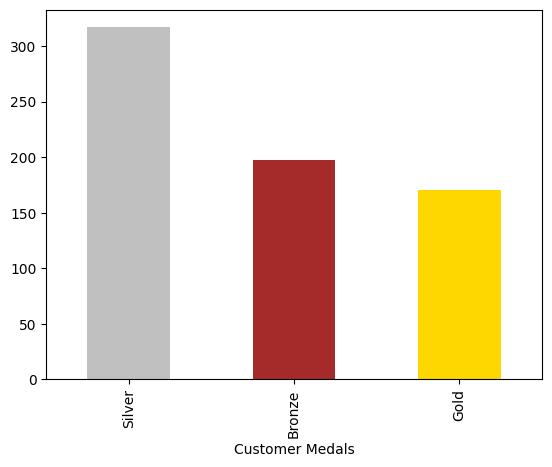

In [130]:
#Lets create a well-visualized bar graph of the different groups of medals our customers fit in

mapped_colors = ['silver', 'brown', 'gold']

rfm['Customer Medals'].value_counts().plot(kind = 'bar', color = mapped_colors)

**Bronze:**
- These customers had the longest mean recency value of 730 days which means they did not make a purchase the longest out of the 3 groups on average.
- They have the lowest mean frequency of around 1.8 purchases which also is the lowest of the 3.
- As a whole, the Bronze group is our least engaged, least profitable, and least monetary valued customer base.

**Silver:**
- These customers represent a middle of the pack approach in regards to the RFM metrics.
- They learn closer to Gold in terms of recency of purchase but lean closer to Bronze in regards to monetary value.

**Gold:**
- Our most highly valued customer base has the best RFM metrics across the board.
- They frequently buy, are the most engaged, and present the best monetary value to the business.

#Summary

- For Question 1, we analyzed that there is no correlation between our top-ordered customers and our most profitable customers.
- For Question 2, we can see that Binders and Copiers are a part of our top profit makers and holds true for the items our top earners are purchasing from.
- For Question 3, geographically, Binders, Copiers, and Accessories are among the top products in our most profitable markets. Apart from Phoenis, Machines, Bookcases, and Tablets are driving the loss in profits in our worst performing areas.
- When looking at the Business Intelligence metrics we can dive deeper into the analysis and find key metrics to further future business decisions.
- We used Cohort Indexes and RFM metrics to segment our customers so the business can use this more targeted info to make targeted moves to improve on them.